In [17]:
import pandas as pd
import numpy as np

data = pd.read_csv("LinearRegressionData.csv")

Normalizing the dataset using preprocessing from sklearn

In [28]:
from sklearn import preprocessing
x_array = np.array([data['SAT']])
y_array = np.array([data['GPA']])
d_x = preprocessing.normalize(x_array)
d_y = preprocessing.normalize(y_array)
# scaled_df = pd.DataFrame(d, columns=SAT)
# scaled_df.head()
# d.head()
print(len(d_x), len(d_y[0]))
d_x = d_x[0]
d_y = d_y[0]
print(len(d_x), d_y)

1 84
84 [0.0783743  0.08229302 0.08294614 0.08947733 0.09241636 0.09502884
 0.09796788 0.09796788 0.09829444 0.09829444 0.098621   0.10025379
 0.10058035 0.10058035 0.10188659 0.10351939 0.10351939 0.10351939
 0.10351939 0.10417251 0.10417251 0.10417251 0.10449907 0.10482563
 0.10580531 0.10711154 0.10711154 0.10711154 0.10711154 0.10711154
 0.10711154 0.10711154 0.1074381  0.1074381  0.1074381  0.10809122
 0.10841778 0.1090709  0.11005058 0.11005058 0.11005058 0.11037714
 0.11037714 0.1107037  0.1107037  0.11103026 0.11103026 0.11103026
 0.11135682 0.11135682 0.11135682 0.11168338 0.11168338 0.11168338
 0.1123365  0.11331618 0.11331618 0.11331618 0.11331618 0.11364274
 0.1139693  0.1139693  0.11429586 0.11462241 0.11462241 0.11494897
 0.11494897 0.11560209 0.11690833 0.11690833 0.11723489 0.11723489
 0.11756145 0.11756145 0.11788801 0.11821457 0.11886769 0.11919425
 0.12115361 0.12115361 0.12115361 0.12180673 0.1227864  0.1244192 ]


In [10]:
data.head()
# d.shape()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [25]:
df_x=data.iloc[:,[0]]
df_y=data.iloc[:,[1]]
df_x

,SAT
0,1714
1,1664
2,1760
3,1685
4,1693
...,...
79,1936
80,1810
81,1987
82,1962


In [27]:
x=df_x.iloc[:,0]
x=pd.to_numeric(x)

y=df_y.iloc[:,0]
y = pd.to_numeric(y)
len(x)


84

Length of result list is  1000
[0.005952380952380956, 1.1881523459299822e-05, 0.00010875211766163498]
[0.005940418813798336, 2.3751058410335505e-05, 0.0002173941888755039]
[0.005928480871165986, 3.560861698388857e-05, 0.0003259263249940392]
[0.0059165670755424804, 4.7454211298465795e-05, 0.00043434863725699943]
[0.005904677378085393, 5.9287853460311636e-05, 0.000542661236791583]
[0.0058928117300510886, 7.110955556342063e-05, 0.0006508642346125427]
[0.00588097008279453, 8.291932968954979e-05, 0.0007589577416222988]
[0.005869152387769073, 9.471718790823102e-05, 0.0008669418686110532]
[0.0058573585965262685, 0.00010650314227678339, 0.0009748167262569024]
[0.00584558866071567, 0.00011827720484032564, 0.0010825824251259517]
[0.005833842532084619, 0.00013003938763178838, 0.0011902390756724282]
[0.005822120162478072, 0.00014178970267192652, 0.0012977867882387937]
[0.005810421503838379, 0.00015352816196933158, 0.001405225673055858]
[0.005798746508205101, 0.0001652547775204439, 0.00151255584024

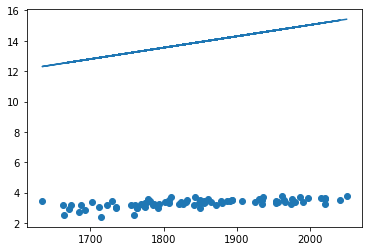

In [40]:
import random
def gradient_descent(x,y):
    result = []
    m = 0 
    c = 0
    alpha = 0.001
    iterations = 1000

    for j in range(iterations):
        
        Total_J = 0
        d_m = 0 # accumulate total gradient in m
        d_c = 0 # accumulate total gradient in c

        for row in range(len(x)): # looping over number of training examples

            # hypothesis function
            hx = m*x[row]+c
            
            # cost function 
            J = ( (hx-y[row])**2 )
            Total_J = Total_J + J

            d_c = d_c + (hx - y[row])
            d_m = d_m + x[row]*(hx - y[row])
        
        Total_J = Total_J/(2*len(x))
        # update m and c 
        temp0 = c - alpha * (d_c/(len(x)))
        temp1 = m - alpha * (d_m/(len(x)))
        c = temp0
        m = temp1
        result.append([Total_J,m,c])

    print('Length of result list is ',len(result))
    for i in result:
        print(i)
    return min(result, key=lambda x: x[0])

    # return [m,c]

X = np.array([i for i in range(11)])
Y = np.array([2*i+random.randint(-2, 3) for i in range(11)])

ans = gradient_descent(d_x,d_y)
print(ans)
plt.scatter(x,y)
Y2 = ans[1]*x+ans[2]
plt.plot(x,Y2)
# print(d_x,d_y)

C:\Users\ALIRIZ~1\AppData\Local\Temp/ipykernel_4296/3675309402.py:52: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


100 epochs elapsed
Current accuracy is : 0.8312534713798102


C:\Users\ALIRIZ~1\AppData\Local\Temp/ipykernel_4296/3675309402.py:52: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
C:\Users\ALIRIZ~1\AppData\Local\Temp/ipykernel_4296/3675309402.py:96: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  h.show()


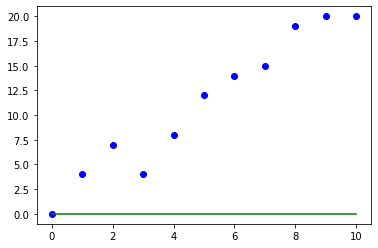

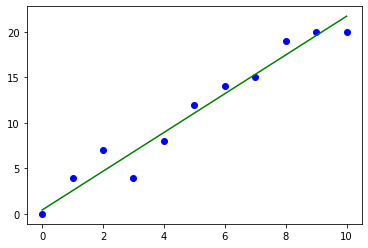

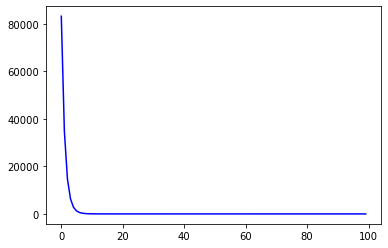

In [30]:
# Implementation of gradient descent in linear regression
# This code borrowed from https://www.geeksforgeeks.org/gradient-descent-in-linear-regression/
import numpy as np
import matplotlib.pyplot as plt

class Linear_Regression:
	def __init__(self, X, Y):
		self.X = X
		self.Y = Y
		self.b = [0, 0]
	
	def update_coeffs(self, learning_rate):
		Y_pred = self.predict()
		Y = self.Y
		m = len(Y)
		self.b[0] = self.b[0] - (learning_rate * ((1/m) *
								np.sum(Y_pred - Y)))

		self.b[1] = self.b[1] - (learning_rate * ((1/m) *
								np.sum((Y_pred - Y) * self.X)))

	def predict(self, X=[]):
		Y_pred = np.array([])
		if not X: X = self.X
		b = self.b
		# print("Parameter values ",b)
		for x in X:
			Y_pred = np.append(Y_pred, b[0] + (b[1] * x))

		return Y_pred
	
	def get_current_accuracy(self, Y_pred):
		p, e = Y_pred, self.Y
		n = len(Y_pred)
		return 1-sum(
			[
				abs(p[i]-e[i])/e[i]
				for i in range(n)
				if e[i] != 0]
		)/n
	#def predict(self, b, yi):

	def compute_cost(self, Y_pred):
		m = len(self.Y)
		J = (1 / 2*m) * (np.sum(Y_pred - self.Y)**2)
		return J

	def plot_best_fit(self, Y_pred, fig):
				f = plt.figure(fig)
				plt.scatter(self.X, self.Y, color='b')
				plt.plot(self.X, Y_pred, color='g')
				f.show()


def main():
	X = np.array([i for i in range(11)])
	Y = np.array([2*i for i in range(11)])

	for i in range(1,len(Y)):
		Y[i] = Y[i] + random.randint(-2, 3)

	regressor = Linear_Regression(X, Y)

	iterations = 0
	steps = 100
	learning_rate = 0.01
	costs = []
	
	#original best-fit line
	Y_pred = regressor.predict()
	regressor.plot_best_fit(Y_pred, 'Initial Best Fit Line')
	

	while iterations<1000:
		Y_pred = regressor.predict()
		cost = regressor.compute_cost(Y_pred)
		costs.append(cost)
		regressor.update_coeffs(learning_rate)
		
		iterations += 1
		if iterations % steps == 0:
			print(iterations, "epochs elapsed")
			print("Current accuracy is :",
				regressor.get_current_accuracy(Y_pred))

			stop = input("Do you want to stop (y/*)??")
			if stop == "y":
				break

	#final best-fit line
	regressor.plot_best_fit(Y_pred, 'Final Best Fit Line')

	#plot to verify cost function decreases
	h = plt.figure('Verification')
	plt.plot(range(iterations), costs, color='b')
	h.show()

	# if user wants to predict using the regressor:
	regressor.predict([i for i in range(10)])

if __name__ == '__main__':
	main()
